# Nobel Peace Prize lectures analysis

## Problem Statement

The goal of the project is to look at the scripts of the lecturs of the Nobel Peace Prize winners and note their similarities and differences.

## Introduction

This notebook goes through a necessary step of any data science project - data cleaning. Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

 - Getting the data - *in this case, we'll be scraping data from a website
 - Cleaning the data - *we will walk through popular text pre-processing techniques
 - Organizing the data - *we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this notebook will be clean, organized data in two standard text formats:

   1. Corpus - a collection of text
   2. Document-Term Matrix - word counts in matrix format

## Getting the data

Data has been scraped from Nobel Prize Website. Here I have srcaped 15 different lectures.

In [28]:
import pickle
# Nobel laureats names
laureates = ['cremer','roosevelt','teresa','lama','gbowee', 'xiaobo', 'malala', 'juan', 
             'nadia', 'dea-jung', 'carter', 'ebadi', 'wangari', 'elbaradei', 'yunus']
# Load pickled files
data = {}
for i, c in enumerate(laureates):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [29]:
data.keys()

dict_keys(['cremer', 'roosevelt', 'teresa', 'lama', 'gbowee', 'xiaobo', 'malala', 'juan', 'nadia', 'dea-jung', 'carter', 'ebadi', 'wangari', 'elbaradei', 'yunus'])

In [30]:
data['cremer'][:5]

['Nobel Lecture*,   January 15, 1905',
 '\xa0',
 'For many reasons I regret the delay which   has taken place in my appearance here. Ever since the Nobel   Committee awarded me the prize, I have been anxious to fulfill   the condition which they impose upon the recipient, that he   should visit Christiania [Oslo] and deliver an address upon the   subject of arbitration and peace.',
 'Several circumstances entirely beyond my   control have led to the delay, a delay which I deeply regret and   for which I ask you to excuse me.',
 'Travelers anxious to reach their journey’s   end, occasionally ask themselves how far they have got and how   much farther they have to go before they reach the goal of their   hopes. The progress they have made can be easily ascertained, but   the remaining distance and possible accidents on the way are more   difficult to calculate.']

## Cleaning the data

Common data cleaning steps on all text:

   - Make text all lower case
   - Remove punctuation
   - Remove numerical values
   - Remove common non-sensical text (/n)
   - Tokenize text
   - Remove stop words

More data cleaning steps after tokenization:

   - Stemming / lemmatization
   - Parts of speech tagging
   - Create bi-grams or tri-grams
   - Deal with typos

In [31]:
next(iter(data.keys()))

'cremer'

In [32]:
next(iter(data.values()))

['Nobel Lecture*,   January 15, 1905',
 '\xa0',
 'For many reasons I regret the delay which   has taken place in my appearance here. Ever since the Nobel   Committee awarded me the prize, I have been anxious to fulfill   the condition which they impose upon the recipient, that he   should visit Christiania [Oslo] and deliver an address upon the   subject of arbitration and peace.',
 'Several circumstances entirely beyond my   control have led to the delay, a delay which I deeply regret and   for which I ask you to excuse me.',
 'Travelers anxious to reach their journey’s   end, occasionally ask themselves how far they have got and how   much farther they have to go before they reach the goal of their   hopes. The progress they have made can be easily ascertained, but   the remaining distance and possible accidents on the way are more   difficult to calculate.',
 '   In the time at our disposal this evening, we pilgrims of peace   might imitate the traveler and note how many milestones 

In [33]:
# We are going to change this to key: laureates, value: string format

def combine_text(list_of_text):
    combine_text = ' '.join(list_of_text)
    
    return combine_text

In [34]:
# Combine all!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
data_combined

{'cremer': ['Nobel Lecture*,   January 15, 1905 \xa0 For many reasons I regret the delay which   has taken place in my appearance here. Ever since the Nobel   Committee awarded me the prize, I have been anxious to fulfill   the condition which they impose upon the recipient, that he   should visit Christiania [Oslo] and deliver an address upon the   subject of arbitration and peace. Several circumstances entirely beyond my   control have led to the delay, a delay which I deeply regret and   for which I ask you to excuse me. Travelers anxious to reach their journey’s   end, occasionally ask themselves how far they have got and how   much farther they have to go before they reach the goal of their   hopes. The progress they have made can be easily ascertained, but   the remaining distance and possible accidents on the way are more   difficult to calculate.    In the time at our disposal this evening, we pilgrims of peace   might imitate the traveler and note how many milestones we have  

In [35]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',200)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
carter,"Nobel Lecture, Oslo, December 10, 2002 Your Majesties, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, It is with a deep sense of gratitude that I accept this prize..."
cremer,"Nobel Lecture*, January 15, 1905 For many reasons I regret the delay which has taken place in my appearance here. Ever since the Nobel Committee awarded me the prize, I have been anxious t..."
dea-jung,"Nobel Lecture, Oslo, December 10, 2000 Your Majesty, Your Royal Highnesses, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, Human rights and peace have a sac..."
ebadi,"Farsi (pdf) Nobel Lecture, Oslo, December 10, 2003 Your Majesty, Your Royal Highnesses, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, I feel extremely ..."
elbaradei,"Nobel Lecture, Oslo, December 10, 2005. Your Majesties, Your Royal Highness, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen. Th..."
gbowee,"Nobel Lecture by Leymah Roberta Gbowee, Oslo, 10 December 2011 Your Majesties, Your Royal Highnesses, Excellencies Distinguished Members of the Norwegian Nobel Committee, Global Leaders Wom..."
juan,"© THE NOBEL FOUNDATION, STOCKHOLM, 2016\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or books, or in digital or electronic forms, ot..."
lama,"Nobel Lecture, December 11, 1989 Brothers and Sisters: It is an honour and pleasure to be among you today. I am really happy to see so many old friends who have come from different corners of ..."
malala,"Nobel Lecture by Malala Yousafzai, Oslo, 10 December 2014. Bismillah hir rahman ir rahim.\nIn the name of God, the most merciful, the most beneficent. Your Majesties, Your royal highnesses, dist..."
nadia,"Norwegian\nEnglish\nFrench\nArabic (pdf) © THE NOBEL FOUNDATION, STOCKHOLM, 2018\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or boo..."


In [36]:
data_df.transcript.loc['yunus']

'Nobel Lecture, Oslo, December 10, 2006.    Your Majesties, Your Royal Highnesses, Honorable Members of     the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen,   Grameen Bank and I are deeply honoured to receive this most prestigious   of awards. We are thrilled and overwhelmed by this honour. Since   the Nobel Peace Prize was announced, I have received endless messages   from around the world, but what moves me most are the calls I get   almost daily, from the borrowers of Grameen Bank in remote Bangladeshi   villages, who just want to say how proud they are to have received   this recognition.   Nine elected representatives of the 7 million borrowers-cum-owners   of Grameen Bank have accompanied me all the way to Oslo to receive   the prize. I express thanks on their behalf to the Norwegian Nobel   Committee for choosing Grameen Bank for this year’s Nobel Peace   Prize. By giving their institution the most prestigious prize in   the world, you give them unparalleled ho

In [37]:
import re
import string

In [47]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = text.replace('©', '')
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cln_text = lambda x: clean_text_round1(x)

In [48]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(cln_texttext))
data_clean

,transcript
carter,nobel lecture oslo december your majesties members of the norwegian nobel committee excellencies ladies and gentlemen it is with a deep sense of gratitude that i accept this prize i am gratefu...
cremer,nobel lecture january for many reasons i regret the delay which has taken place in my appearance here ever since the nobel committee awarded me the prize i have been anxious to fulfill ...
dea-jung,nobel lecture oslo december your majesty your royal highnesses members of the norwegian nobel committee excellencies ladies and gentlemen human rights and peace have a sacred ground in ...
ebadi,farsi pdf nobel lecture oslo december your majesty your royal highnesses honourable members of the norwegian nobel committee excellencies ladies and gentlemen i feel extremely honoured that to...
elbaradei,nobel lecture oslo december your majesties your royal highness honourable members of the norwegian nobel committee excellencies ladies and gentlemen the international...
gbowee,nobel lecture by leymah roberta gbowee oslo december your majesties your royal highnesses excellencies distinguished members of the norwegian nobel committee global leaders women of liber...
juan,the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or electronic forms otherwise than in sum...
lama,nobel lecture december brothers and sisters it is an honour and pleasure to be among you today i am really happy to see so many old friends who have come from different corners of the world ...
malala,nobel lecture by malala yousafzai oslo december bismillah hir rahman ir rahimin the name of god the most merciful the most beneficent your majesties your royal highnesses distinguished members...
nadia,norwegianenglishfrencharabic pdf the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or elect...


In [49]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [50]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
carter,nobel lecture oslo december your majesties members of the norwegian nobel committee excellencies ladies and gentlemen it is with a deep sense of gratitude that i accept this prize i am gratefu...
cremer,nobel lecture january for many reasons i regret the delay which has taken place in my appearance here ever since the nobel committee awarded me the prize i have been anxious to fulfill ...
dea-jung,nobel lecture oslo december your majesty your royal highnesses members of the norwegian nobel committee excellencies ladies and gentlemen human rights and peace have a sacred ground in ...
ebadi,farsi pdf nobel lecture oslo december your majesty your royal highnesses honourable members of the norwegian nobel committee excellencies ladies and gentlemen i feel extremely honoured that to...
elbaradei,nobel lecture oslo december your majesties your royal highness honourable members of the norwegian nobel committee excellencies ladies and gentlemen the international...
gbowee,nobel lecture by leymah roberta gbowee oslo december your majesties your royal highnesses excellencies distinguished members of the norwegian nobel committee global leaders women of liber...
juan,the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or electronic forms otherwise than in sum...
lama,nobel lecture december brothers and sisters it is an honour and pleasure to be among you today i am really happy to see so many old friends who have come from different corners of the world ...
malala,nobel lecture by malala yousafzai oslo december bismillah hir rahman ir rahimin the name of god the most merciful the most beneficent your majesties your royal highnesses distinguished members...
nadia,norwegianenglishfrencharabic pdf the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or elect...


## Organizaing the data

Let us organize data in two standard text formats:
    1. Corpus - a collection of text
    2. Document-Term Matrix - "word counts in matrix format"
    
Corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here. 

In [55]:
data_df

,transcript,full_name
carter,"Nobel Lecture, Oslo, December 10, 2002 Your Majesties, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, It is with a deep sense of gratitude that I accept this prize...",Jimmy Carter
cremer,"Nobel Lecture*, January 15, 1905 For many reasons I regret the delay which has taken place in my appearance here. Ever since the Nobel Committee awarded me the prize, I have been anxious t...",Cremer
dea-jung,"Nobel Lecture, Oslo, December 10, 2000 Your Majesty, Your Royal Highnesses, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, Human rights and peace have a sac...",Kim Dea-jung
ebadi,"Farsi (pdf) Nobel Lecture, Oslo, December 10, 2003 Your Majesty, Your Royal Highnesses, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, I feel extremely ...",Shirin Ebadi
elbaradei,"Nobel Lecture, Oslo, December 10, 2005. Your Majesties, Your Royal Highness, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen. Th...",Mohamed ElBaradei
gbowee,"Nobel Lecture by Leymah Roberta Gbowee, Oslo, 10 December 2011 Your Majesties, Your Royal Highnesses, Excellencies Distinguished Members of the Norwegian Nobel Committee, Global Leaders Wom...",Leymah Gbowee
juan,"© THE NOBEL FOUNDATION, STOCKHOLM, 2016\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or books, or in digital or electronic forms, ot...",Juan Manuel Santos
lama,"Nobel Lecture, December 11, 1989 Brothers and Sisters: It is an honour and pleasure to be among you today. I am really happy to see so many old friends who have come from different corners of ...",Dalai lama
malala,"Nobel Lecture by Malala Yousafzai, Oslo, 10 December 2014. Bismillah hir rahman ir rahim.\nIn the name of God, the most merciful, the most beneficent. Your Majesties, Your royal highnesses, dist...",Malala Yousafzai
nadia,"Norwegian\nEnglish\nFrench\nArabic (pdf) © THE NOBEL FOUNDATION, STOCKHOLM, 2018\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or boo...",Nadia Murad


In [56]:
# Let's add the comedians' full names as well
full_names = ['Jimmy Carter', 'Cremer', 'Kim Dea-jung',
              'Shirin Ebadi', 'Mohamed ElBaradei', 'Leymah Gbowee', 
              'Juan Manuel Santos','Dalai lama', 'Malala Yousafzai','Nadia Murad',
              'Roosevelt','Mother Teresa','Wangari Muta Maathai', 'Liu Xiaobo', 'Mohammad Yunus']
data_df['full_name'] = full_names
data_df

,transcript,full_name
carter,"Nobel Lecture, Oslo, December 10, 2002 Your Majesties, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, It is with a deep sense of gratitude that I accept this prize...",Jimmy Carter
cremer,"Nobel Lecture*, January 15, 1905 For many reasons I regret the delay which has taken place in my appearance here. Ever since the Nobel Committee awarded me the prize, I have been anxious t...",Cremer
dea-jung,"Nobel Lecture, Oslo, December 10, 2000 Your Majesty, Your Royal Highnesses, Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, Human rights and peace have a sac...",Kim Dea-jung
ebadi,"Farsi (pdf) Nobel Lecture, Oslo, December 10, 2003 Your Majesty, Your Royal Highnesses, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen, I feel extremely ...",Shirin Ebadi
elbaradei,"Nobel Lecture, Oslo, December 10, 2005. Your Majesties, Your Royal Highness, Honourable Members of the Norwegian Nobel Committee, Excellencies, Ladies and Gentlemen. Th...",Mohamed ElBaradei
gbowee,"Nobel Lecture by Leymah Roberta Gbowee, Oslo, 10 December 2011 Your Majesties, Your Royal Highnesses, Excellencies Distinguished Members of the Norwegian Nobel Committee, Global Leaders Wom...",Leymah Gbowee
juan,"© THE NOBEL FOUNDATION, STOCKHOLM, 2016\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or books, or in digital or electronic forms, ot...",Juan Manuel Santos
lama,"Nobel Lecture, December 11, 1989 Brothers and Sisters: It is an honour and pleasure to be among you today. I am really happy to see so many old friends who have come from different corners of ...",Dalai lama
malala,"Nobel Lecture by Malala Yousafzai, Oslo, 10 December 2014. Bismillah hir rahman ir rahim.\nIn the name of God, the most merciful, the most beneficent. Your Majesties, Your royal highnesses, dist...",Malala Yousafzai
nadia,"Norwegian\nEnglish\nFrench\nArabic (pdf) © THE NOBEL FOUNDATION, STOCKHOLM, 2018\nGeneral permission is granted for the publication in newspapers in any language. Publication in periodicals or boo...",Nadia Murad


In [57]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

## Documrnt-Term Matrix

The text must be tokenized, meaning broken down into smaller places. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CounterVectorizer, where every row will represent a diferent document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [46]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoning,abandonment,abdi,abhor,abiding,abilities,ability,abject,able,ablebodied,...,younger,youngest,yousafzai,youth,youthful,zhang,zheng,zone,zones,álvaro
carter,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
cremer,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
dea-jung,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
ebadi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elbaradei,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
gbowee,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
juan,0,0,0,0,0,0,0,0,2,0,...,1,1,0,0,1,0,0,0,0,1
lama,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,6,2,0
malala,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
nadia,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_clean

,transcript
carter,nobel lecture oslo december your majesties members of the norwegian nobel committee excellencies ladies and gentlemen it is with a deep sense of gratitude that i accept this prize i am gratefu...
cremer,nobel lecture january for many reasons i regret the delay which has taken place in my appearance here ever since the nobel committee awarded me the prize i have been anxious to fulfill ...
dea-jung,nobel lecture oslo december your majesty your royal highnesses members of the norwegian nobel committee excellencies ladies and gentlemen human rights and peace have a sacred ground in ...
ebadi,farsi pdf nobel lecture oslo december your majesty your royal highnesses honourable members of the norwegian nobel committee excellencies ladies and gentlemen i feel extremely honoured that to...
elbaradei,nobel lecture oslo december your majesties your royal highness honourable members of the norwegian nobel committee excellencies ladies and gentlemen the international...
gbowee,nobel lecture by leymah roberta gbowee oslo december your majesties your royal highnesses excellencies distinguished members of the norwegian nobel committee global leaders women of liber...
juan,the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or electronic forms otherwise than in sum...
lama,nobel lecture december brothers and sisters it is an honour and pleasure to be among you today i am really happy to see so many old friends who have come from different corners of the world ...
malala,nobel lecture by malala yousafzai oslo december bismillah hir rahman ir rahimin the name of god the most merciful the most beneficent your majesties your royal highnesses distinguished members...
nadia,norwegianenglishfrencharabic pdf the nobel foundation stockholm permission is granted for the publication in newspapers in any language publication in periodicals or books or in digital or elect...


In [164]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [165]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [166]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,carter,cremer,dea-jung,ebadi,elbaradei,gbowee,juan,lama,malala,nadia,roosevelt,teresa,wangari,xiaobo,yunus
abandoning,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
abandonment,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
abdi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
abhor,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
abiding,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'carter': [('peace', 16),
  ('nations', 14),
  ('war', 13),
  ('human', 11),
  ('world', 11),
  ('united', 8),
  ('great', 8),
  ('international', 8),
  ('lives', 7),
  ('rights', 7),
  ('global', 6),
  ('years', 5),
  ('common', 5),
  ('suffering', 5),
  ('nobel', 5),
  ('state', 4),
  ('neighbors', 4),
  ('power', 4),
  ('nuclear', 4),
  ('american', 4),
  ('countries', 4),
  ('work', 4),
  ('principles', 4),
  ('oslo', 4),
  ('president', 4),
  ('personal', 4),
  ('ladies', 3),
  ('poorest', 3),
  ('soviet', 3),
  ('change', 3)],
 'cremer': [('arbitration', 24),
  ('great', 23),
  ('nations', 17),
  ('peace', 16),
  ('britain', 15),
  ('war', 14),
  ('treaty', 13),
  ('british', 13),
  ('treaties', 12),
  ('hague', 11),
  ('states', 10),
  ('united', 10),
  ('france', 10),
  ('union', 10),
  ('convention', 9),
  ('governments', 9),
  ('time', 9),
  ('conference', 7),
  ('signed', 7),
  ('international', 7),
  ('led', 6),
  ('conferences', 6),
  ('make', 6),
  ('french', 6),
  ('ref

In [168]:
# Print the top 15 words said by each comedian
for laureates, top_words in top_dict.items():
    print(laureates)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

carter
peace, nations, war, human, world, united, great, international, lives, rights, global, years, common, suffering
---
cremer
arbitration, great, nations, peace, britain, war, treaty, british, treaties, hague, states, united, france, union
---
dea-jung
people, korea, peace, north, democracy, korean, unification, human, peninsula, cooperation, sides, rights, nobel, asia
---
ebadi
human, rights, people, international, years, women, iran, nobel, universal, states, nations, war, culture, countries
---
elbaradei
nuclear, world, weapons, human, security, imagine, people, war, new, ladies, gentlemen, iaea, today, technology
---
gbowee
women, world, prize, peace, liberia, time, war, nobel, come, womens, let, ma, violence, social
---
juan
peace, world, war, nobel, colombia, agreement, prize, people, today, process, victims, colombian, country, end
---
lama
peace, tibet, people, human, world, development, today, chinese, hope, sense, country, tibetans, tibetan, develop
---
malala
education,

In [169]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['peace',
 'nations',
 'war',
 'human',
 'world',
 'united',
 'great',
 'international',
 'lives',
 'rights',
 'global',
 'years',
 'common',
 'suffering',
 'nobel',
 'state',
 'neighbors',
 'power',
 'nuclear',
 'american',
 'countries',
 'work',
 'principles',
 'oslo',
 'president',
 'personal',
 'ladies',
 'poorest',
 'soviet',
 'change',
 'arbitration',
 'great',
 'nations',
 'peace',
 'britain',
 'war',
 'treaty',
 'british',
 'treaties',
 'hague',
 'states',
 'united',
 'france',
 'union',
 'convention',
 'governments',
 'time',
 'conference',
 'signed',
 'international',
 'led',
 'conferences',
 'make',
 'french',
 'referred',
 'members',
 'opinion',
 'subject',
 'paris',
 'russian',
 'people',
 'korea',
 'peace',
 'north',
 'democracy',
 'korean',
 'unification',
 'human',
 'peninsula',
 'cooperation',
 'sides',
 'rights',
 'nobel',
 'asia',
 'history',
 'heaven',
 'countries',
 'europe',
 'reconciliation',
 'world',
 'chairman',
 'years',
 'military',
 'support',
 'summit',
 '

In [170]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('world', 13),
 ('peace', 12),
 ('nobel', 10),
 ('people', 10),
 ('human', 8),
 ('war', 7),
 ('rights', 7),
 ('international', 6),
 ('time', 6),
 ('women', 6),
 ('prize', 6),
 ('children', 6),
 ('nations', 5),
 ('united', 5),
 ('years', 5),
 ('today', 5),
 ('great', 4),
 ('countries', 4),
 ('states', 4),
 ('make', 4),
 ('country', 4),
 ('lives', 3),
 ('work', 3),
 ('democracy', 3),
 ('political', 3),
 ('freedom', 3),
 ('new', 3),
 ('come', 3),
 ('let', 3),
 ('violence', 3),
 ('social', 3),
 ('justice', 3),
 ('did', 3),
 ('global', 2),
 ('power', 2),
 ('nuclear', 2),
 ('ladies', 2),
 ('arbitration', 2),
 ('treaties', 2),
 ('hague', 2),
 ('conference', 2),
 ('members', 2),
 ('support', 2),
 ('culture', 2),
 ('security', 2),
 ('committee', 2),
 ('hope', 2),
 ('family', 2),
 ('believe', 2),
 ('cent', 2),
 ('community', 2),
 ('honor', 2),
 ('lost', 2),
 ('process', 2),
 ('victims', 2),
 ('say', 2),
 ('development', 2),
 ('different', 2),
 ('environment', 2),
 ('child', 2),
 ('thank', 2),
 

In [171]:
add_stop_words = [word for word, count in Counter(words).most_common()]
add_stop_words

['world',
 'peace',
 'nobel',
 'people',
 'human',
 'war',
 'rights',
 'international',
 'time',
 'women',
 'prize',
 'children',
 'nations',
 'united',
 'years',
 'today',
 'great',
 'countries',
 'states',
 'make',
 'country',
 'lives',
 'work',
 'democracy',
 'political',
 'freedom',
 'new',
 'come',
 'let',
 'violence',
 'social',
 'justice',
 'did',
 'global',
 'power',
 'nuclear',
 'ladies',
 'arbitration',
 'treaties',
 'hague',
 'conference',
 'members',
 'support',
 'culture',
 'security',
 'committee',
 'hope',
 'family',
 'believe',
 'cent',
 'community',
 'honor',
 'lost',
 'process',
 'victims',
 'say',
 'development',
 'different',
 'environment',
 'child',
 'thank',
 'know',
 'communities',
 'love',
 'poor',
 'common',
 'suffering',
 'state',
 'neighbors',
 'american',
 'principles',
 'oslo',
 'president',
 'personal',
 'poorest',
 'soviet',
 'change',
 'britain',
 'treaty',
 'british',
 'france',
 'union',
 'convention',
 'governments',
 'signed',
 'led',
 'conferences'

In [172]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [173]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", 
               colormap="Dark2",
               max_font_size=150, random_state=42)

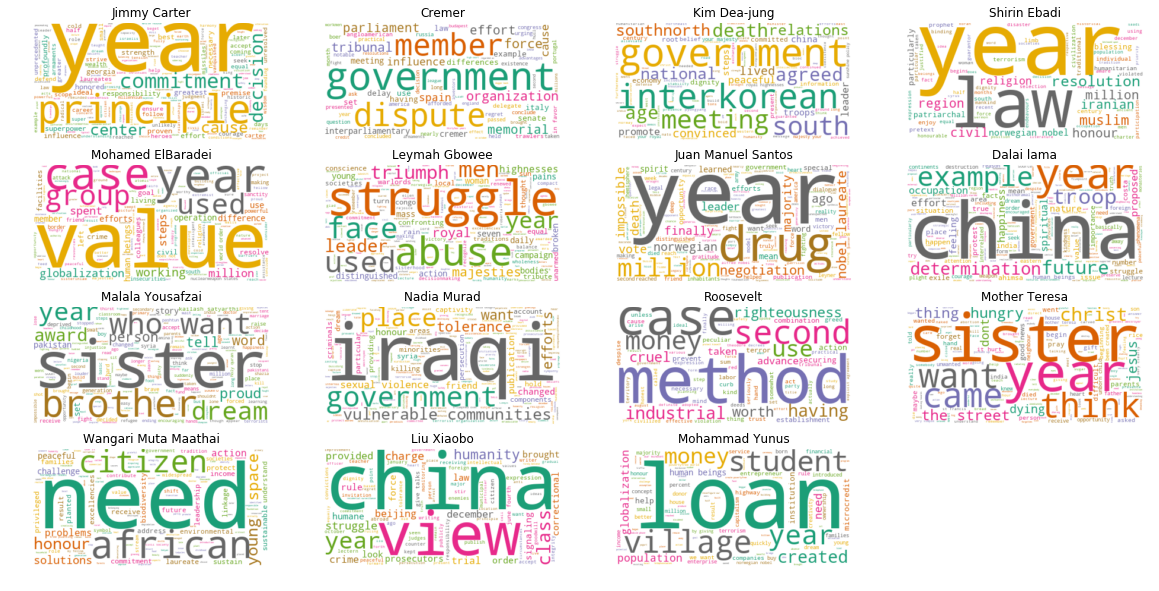

In [174]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

full_names = ['Jimmy Carter', 'Cremer', 'Kim Dea-jung',
              'Shirin Ebadi', 'Mohamed ElBaradei', 'Leymah Gbowee', 
              'Juan Manuel Santos','Dalai lama', 'Malala Yousafzai','Nadia Murad',
              'Roosevelt','Mother Teresa','Wangari Muta Maathai', 'Liu Xiaobo', 'Mohammad Yunus']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [175]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for laureates in data.columns:
    uniques = data[laureates].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['laureates', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,laureates,unique_words
5,Leymah Gbowee,412
8,Malala Yousafzai,487
11,Mother Teresa,526
3,Shirin Ebadi,529
9,Nadia Murad,532
10,Roosevelt,546
13,Liu Xiaobo,618
2,Kim Dea-jung,652
12,Wangari Muta Maathai,680
0,Jimmy Carter,784


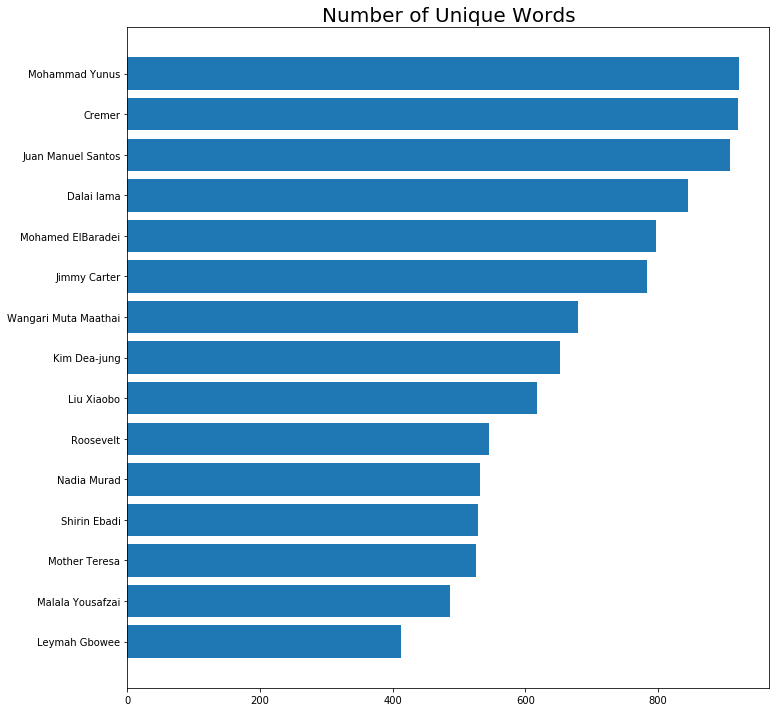

In [180]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.laureates)
plt.title('Number of Unique Words', fontsize=20)


plt.tight_layout()
plt.show()

In [181]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('world', 13),
 ('peace', 12),
 ('nobel', 10),
 ('people', 10),
 ('human', 8),
 ('war', 7),
 ('rights', 7),
 ('international', 6),
 ('time', 6),
 ('women', 6),
 ('prize', 6),
 ('children', 6),
 ('nations', 5),
 ('united', 5),
 ('years', 5),
 ('today', 5),
 ('great', 4),
 ('countries', 4),
 ('states', 4),
 ('make', 4),
 ('country', 4),
 ('lives', 3),
 ('work', 3),
 ('democracy', 3),
 ('political', 3),
 ('freedom', 3),
 ('new', 3),
 ('come', 3),
 ('let', 3),
 ('violence', 3),
 ('social', 3),
 ('justice', 3),
 ('did', 3),
 ('global', 2),
 ('power', 2),
 ('nuclear', 2),
 ('ladies', 2),
 ('arbitration', 2),
 ('treaties', 2),
 ('hague', 2),
 ('conference', 2),
 ('members', 2),
 ('support', 2),
 ('culture', 2),
 ('security', 2),
 ('committee', 2),
 ('hope', 2),
 ('family', 2),
 ('believe', 2),
 ('cent', 2),
 ('community', 2),
 ('honor', 2),
 ('lost', 2),
 ('process', 2),
 ('victims', 2),
 ('say', 2),
 ('development', 2),
 ('different', 2),
 ('environment', 2),
 ('child', 2),
 ('thank', 2),
 

In [188]:
# Let's isolate just these bad words
data_keywords = data.transpose()[['peace', 'people', 'right', 'human']]
data_relevency = pd.concat([data_keywords.peace + data_keywords.people, data_keywords.right + data_keywords.human], axis=1)
data_relevency.columns = ['p_word', 'other_word']
data_relevency

,p_word,other_word
carter,19,12
cremer,20,0
dea-jung,34,10
ebadi,15,35
elbaradei,11,17
gbowee,10,1
juan,57,6
lama,61,17
malala,17,6
nadia,18,6


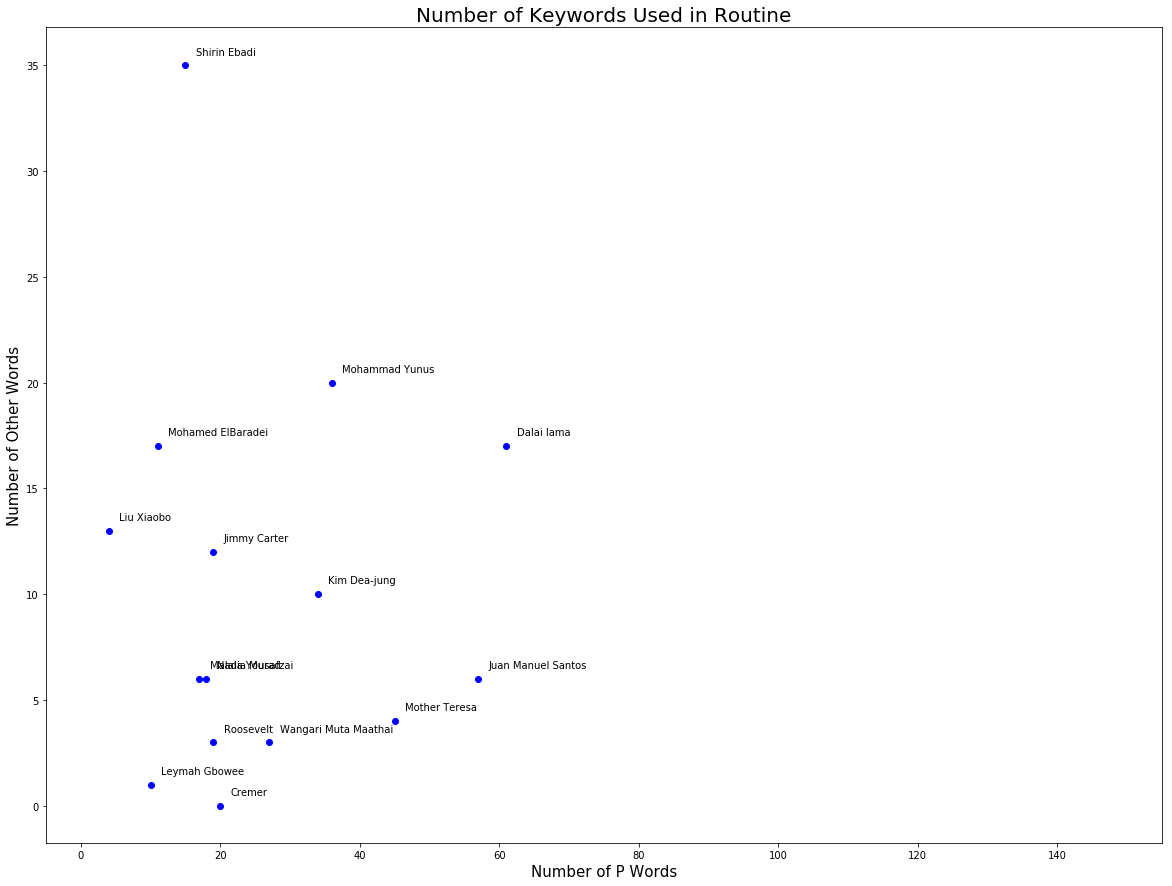

In [196]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [20, 15]

for i, laureate in enumerate(data_relevency.index):
    x = data_relevency.p_word.loc[laureate]
    y = data_relevency.other_word.loc[laureate]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Keywords Used in Routine', fontsize=20)
plt.xlabel('Number of P Words', fontsize=15)
plt.ylabel('Number of Other Words', fontsize=15)

plt.show()